# **분류 문제의 평가방법**

위스콘신 대학에서 공개한 유방암 진단 데이터세트레 로지스틱 회귀 모델로 머신러닝한 코드

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
# 유방암 진단 데이터세트 불러오기
data = load_breast_cancer()

# 특징 데이터 생성
X = data.data

# 종속 변수 생성. 악성 발견이 목적이므로 레이블의 0과 1을 바꿈
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 줄임
X = X[:, :10]

**사이킷런은 레이블에 의미를 부여하지 않아 악성을 0으로**
그러나 실제 유방암 검사는 악성 발견이 목적이므로 악성을 긍정인 1로 설정하는 것이 자연스러움

In [3]:
X.shape

(569, 10)

In [4]:
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
model_lore = LogisticRegression (solver= 'lbfgs')

In [7]:
model_lore.fit ( X, y)
y_pred = model_lore.predict (X)

# **Confusion Matrix** 혼동 행렬

TN, TP

FP ; 실제 부정 데이터를 긍정으로 잘못 예측

FN ; 실제 긍정 데이터를 부정으로 잘못 예측

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
cm = confusion_matrix (y, y_pred)

print(cm)

[[337  20]
 [ 30 182]]


FN; 30
FP: 20

**정확도**

(TP + TN )/(TP +TN + FP + FN)

In [10]:
from sklearn.metrics import accuracy_score

print (accuracy_score(y, y_pred))

0.9121265377855887


**정밀도**

TP/ (TP +FP )

In [11]:
from sklearn.metrics import precision_score

print (precision_score(y, y_pred))

0.900990099009901


**재현율**

TP/ (TP +FN)

In [12]:
from sklearn.metrics import recall_score

print ( recall_score (y, y_pred))

0.8584905660377359


**F값**

정밀도와 재현율을 모두 반영하는 평가 지표

In [13]:
from sklearn.metrics import  f1_score

print (f1_score (y, y_pred))

0.8792270531400966


**예측 확률**



In [14]:
model_lore.predict_proba (X)

array([[7.67417328e-03, 9.92325827e-01],
       [2.03140694e-02, 9.79685931e-01],
       [2.34637518e-03, 9.97653625e-01],
       ...,
       [2.35217156e-02, 9.76478284e-01],
       [8.13272210e-06, 9.99991867e-01],
       [9.99572336e-01, 4.27663708e-04]])

In [15]:
model_lore.predict_proba (X).shape

(569, 2)

In [17]:
import numpy as np

# 예측 확률 중 두 번째 요소가 10% 이상인 값 개수를 np.int 타입으로 변환해 저장
y_pred2 = (model_lore.predict_proba(X)[:, 1] > 0.1).astype(np.int)

print ( confusion_matrix(y, y_pred2))

[[267  90]
 [  6 206]]


In [18]:
#정확도
print (accuracy_score(y, y_pred2))

#재현율
print( recall_score (y, y_pred2))

0.8312829525483304
0.9716981132075472


**ROC곡선과 곡선아래면적**



FPR: false positive rate을 가로축

TPR: true positive rate을 세로축

In [20]:
from sklearn.metrics import roc_curve

# 유방암 진단 데이터세트 특징 데이터의 예측 확률 계산
probas = model_lore.predict_proba(X)

# 종속 변수와 예측 확률의 두 번째 요소로 ROC 곡선을 생성하고 위양성률, 진양성률, 기준값 저장
fpr,tpr, thresholds = roc_curve (y, probas[:, 1])


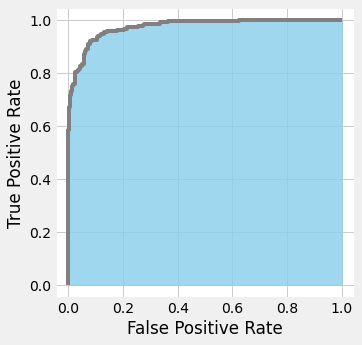

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

# ROC 곡선의 그래프 영역 스타일 지정
plt.style.use('fivethirtyeight')

# 캔버스와 좌표 평면 생성
fig, ax = plt.subplots()

# 그래프 영역의 크기 설정
fig.set_size_inches(4.8, 5)

# 그래프의 선을 이루는 값과 선 색상 설정
ax.step(fpr, tpr, 'gray')

# 그래프의 선을 기준으로 곡선아래면적을 skyblue로 채우도록 설정
ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.8)

# x축 레이블 설정
ax.set_xlabel('False Positive Rate')

# y축 레이블 설정
ax.set_ylabel('True Positive Rate')

# 그래프 영역 배경색 설정
ax.set_facecolor('xkcd:white')

# 최종 그래프 생성
plt.show()

In [22]:
from sklearn.metrics import roc_auc_score

# 종속 변수와 예측 확률의 두 번째 요소로 곡선아래면적 계산
roc_auc_score(y, probas[:, 1])

0.9741557000158554

# **회귀 문제의 평가방법**

In [23]:
from sklearn.datasets import load_boston

data = load_boston()

'feature_names': array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [25]:
# RM 열만 있는 특징 데이터 생성
X = data.data [:, [5,]]

y = data.target

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model_lir = LinearRegression()

model_lir.fit( X,y)
y_pred = model_lir.predict(X)

In [28]:
print(model_lir.coef_)
print(model_lir.intercept_)

[9.10210898]
-34.67062077643857


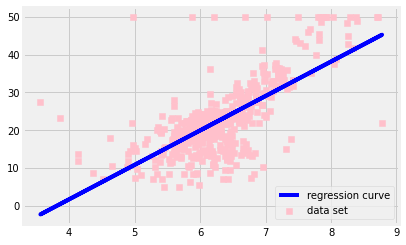

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# 특징과 종속 변수로 data set라는 레이블을 설정한 분홍색 산점도 출력
ax.scatter(X, y, color='pink', marker='s', label='data set')

# 특징과 예측 결과로 regresssion curve라는 레이블을 설정한 파란색 회귀선 생성
ax.plot(X, y_pred, color='blue', label='regression curve')

# 레이블 배치
ax.legend()

# 최종 그래프 생성
plt.show()


**평균제곱오차**

In [30]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y, y_pred))

43.60055177116956


**결정계수**

평균제곱오차를 사용해 학습한 모델 예측의 적합도를 나타냄

In [32]:
from sklearn.metrics import r2_score

print(r2_score (y, y_pred))

0.48352545599133423


# *Support Vector Regression*

서포트 벡터 회귀모델

In [33]:
from sklearn.svm import SVR

In [34]:
model_svr_linear = SVR( C=0.01, kernel='linear')

model_svr_linear.fit (X, y)

y_svr_pred = model_svr_linear.predict (X)

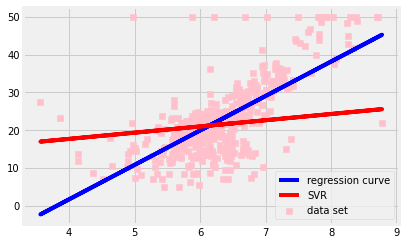

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

# 캔버스와 좌표 평면 생성
fig, ax = plt.subplots()

# 특징과 종속 변수로 data set라는 레이블을 설정한 분홍색 산점도 출력
ax.scatter(X, y, color='pink', marker='s', label='data set')

# 특징과 선형회귀 예측 결과로 regresssion curve라는 레이블을 설정한 파란색 회귀선 생성
ax.plot(X, y_pred, color='blue', label='regression curve')

# 특징과 서포트 벡터 회귀 예측 결과로 SVR이라는 레이블을 설정한 붉은색 회귀선 생성
ax.plot(X, y_svr_pred, color='red', label='SVR')

ax.legend()

plt.show()

In [36]:
print(mean_squared_error(y, y_svr_pred)) # 평균제곱오차 출력
print(r2_score(y, y_svr_pred))           # 결정계수 출력
print(model_svr_linear.coef_)            # 기울기 출력
print(model_svr_linear.intercept_)       # 절편 출력

72.14197118147209
0.14543531775956597
[[1.64398]]
[11.13520958]


**하이퍼 파라미터 설정**

In [37]:
# C와 kernel 인잣값을 바꾸고 gamma 인자를 추가해 서포트 벡터 회귀 모델 생성
model_svr_rbf = SVR(C=1.0, kernel='rbf', gamma='auto')

model_svr_rbf.fit(X, y) # 학습
y_svr_pred = model_svr_rbf.predict(X) # 예측

print(mean_squared_error(y, y_svr_pred)) # 평균제곱오차 출력
print(r2_score(y, y_svr_pred))           # 결정계수 출력

36.42126375260171
0.5685684051071418


In [38]:
len(X)

506

In [39]:
X.shape

(506, 1)

In [40]:
# 특징의 학습 데이터와 검정 데이터 생성
train_X, test_X = X[:400], X[400:]

# 종속 변수의 학습 데이터와 검정 데이터 생성
train_y, test_y = y[:400], y[400:]

# 서포트 벡터 회귀 모델 생성
model_svr_rbf_1 = SVR(C=1.0, kernel='rbf', gamma='auto')

model_svr_rbf_1.fit(train_X, train_y)         # 학습
test_y_pred = model_svr_rbf_1.predict(test_X) # 특징의 검정 데이터로 예측

print(mean_squared_error(test_y, test_y_pred)) # 평균제곱오차 출력
print(r2_score(test_y, test_y_pred))           # 결정계수 출력

69.16928620453004
-1.4478345530124388


# **과적합을 막는 방법**

학습데이터와 검정데이터 나누기

In [43]:
from sklearn.datasets import load_breast_cancer

# 유방암 진단 데이터세트 불러오기
data = load_breast_cancer()

# 특징 데이터 생성
X = data.data

# 종속 변수 데이터 생성
y = data.target

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3)

Support Vector Machine Model

In [46]:
from sklearn.svm import SVC

model_svc = SVC( gamma='auto')
model_svc.fit (X_train, y_train)

y_train_pred = model_svc.predict(X_train)

y_test_pred = model_svc.predict( X_test)

In [47]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_train_pred))

print (accuracy_score(y_test, y_test_pred))

1.0
0.5847953216374269


확실히 과적합

이번에는 RandomForestClassifier 로 학습하는 모델

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model_rfc = RandomForestClassifier (n_estimators= 10)
model_rfc.fit (X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
y_train_pred = model_rfc.predict (X_train)

y_test_pred = model_rfc.predict (X_test)

In [51]:
from sklearn.metrics import accuracy_score

# 학습 데이터의 종속 변수와 예측 결과로 정확도 계산
print(accuracy_score(y_train, y_train_pred))

# 검정 데이터의 종속 변수와 예측 결과로 정확도 계산
print(accuracy_score(y_test, y_test_pred))

0.9974874371859297
0.9707602339181286


**Cross Validation**
교차검증

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [53]:
cv = KFold ( 5, shuffle= True)

model_rfc_1 = RandomForestClassifier (n_estimators= 10)

cross_val_score ( model_rfc_1, X, y, cv=cv, scoring= 'accuracy')

array([0.92105263, 0.96491228, 0.96491228, 0.94736842, 0.9380531 ])

In [54]:
cross_val_score ( model_rfc_1, X, y, cv=cv, scoring= 'f1')

array([0.95522388, 0.93877551, 0.94202899, 0.98717949, 0.95588235])

** 하이퍼 파라미터 탐색하기**

그리드 탐색으로 선택하기 Greed Search

In [55]:

from sklearn.datasets import load_breast_cancer

# 유방암 진단 데이터세트 불러오기
data = load_breast_cancer()

# 특징 데이터 생성
X = data.data

# 종속 변수 생성. 레이블의 0과 1을 바꿈
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 줄임
X = X[:, :10]

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [57]:
cv = KFold ( 5, shuffle= True)

param_grid = { 'max_depth':[ 5, 10, 15], 'n_estimators': [10, 20, 30]}

model_rfc_2 = RandomForestClassifier()

grid_search = GridSearchCV (model_rfc_2, param_grid, cv=cv, scoring='accuracy')

In [58]:
grid_search.fit( X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_sc

In [59]:
print(grid_search.best_score_)

print(grid_search.best_params_)

0.9455208818506444
{'max_depth': 10, 'n_estimators': 10}


In [60]:
grid_search = GridSearchCV (model_rfc_2, param_grid, cv=cv, scoring='f1')

In [62]:
grid_search.fit( X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_sc

In [63]:
print(grid_search.best_score_)

print(grid_search.best_params_)

0.9246290664206749
{'max_depth': 10, 'n_estimators': 30}
